In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Input ##
# Points must be counter-clockwise
# Plate points: XY coordinates of the "locator targets" on the target plate
# Stage points: XY coordinates of the "locator targets" as aligned on the stage
# 0, 0 is bottom right corner of the target plate

plate_points = [[10, 10], 
                [10, 150], 
                [110, 150], 
                [110, 10]]

stage_points = [[-241.25, 124.75], 
                [-239, 264.75], 
                [-139, 263.5], 
                [-141.25, 123.5]]

plate_points = np.array(plate_points).astype(np.float32)
stage_points = np.array(stage_points).astype(np.float32)

[[ 1.0000e+00  2.0000e-02 -2.5141e+02]
 [-1.0000e-02  1.0000e+00  1.1488e+02]
 [-0.0000e+00  0.0000e+00  1.0000e+00]]


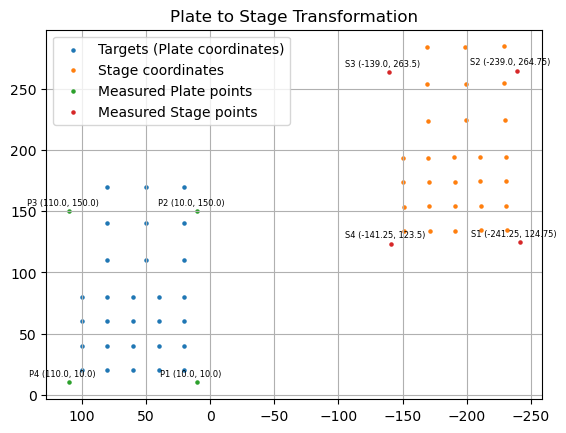

In [3]:
# Calculate transformation matrix
M = cv2.getPerspectiveTransform(plate_points, stage_points)
print(np.round(M, 2))

# Load target points
df = pd.read_csv('points/target_points_2020_xy.csv')
dfnp = df.to_numpy()
target_x_ = dfnp[:, 1]
target_y_ = dfnp[:, 2]
ones = np.ones(target_x_.shape)
target_points = np.vstack((target_x_, target_y_, ones)).T

transformed_points = np.dot(M, target_points.T).T
transformed_stage_x = transformed_points[:, 0] / transformed_points[:, 2]
transformed_stage_y = transformed_points[:, 1] / transformed_points[:, 2]

# Plot
plt.title('Plate to Stage Transformation')
plt.scatter(target_x_, target_y_, label='Targets (Plate coordinates)', s=5)
plt.scatter(transformed_stage_x, transformed_stage_y, label='Stage coordinates', s=5)
plt.scatter(plate_points[:, 0], plate_points[:, 1], label='Measured Plate points', s=5)
plt.scatter(stage_points[:, 0], stage_points[:, 1], label='Measured Stage points', s=5)

# Annotate points
for i in range(len(stage_points)):
    plt.annotate(f'P{i+1} ({plate_points[i, 0]}, {plate_points[i, 1]})', (plate_points[i, 0], plate_points[i, 1]), xytext=(plate_points[i, 0]+5, plate_points[i, 1]+5), ha = 'center', fontsize=6)
for i in range(len(stage_points)):
    plt.annotate(f'S{i+1} ({stage_points[i, 0]}, {stage_points[i, 1]})', (stage_points[i, 0], stage_points[i, 1]), xytext=(stage_points[i, 0]+5, stage_points[i, 1]+5), ha = 'center', fontsize=6)

plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()


In [4]:
# Print target points
print('Transformed points')
for i in range(len(transformed_stage_x)):
    print(f'Point {i+1}:\t{transformed_stage_x[i]:.2f}, {transformed_stage_y[i]:.2f}')

Transformed points
Point 1:	-231.09, 134.62
Point 2:	-211.09, 134.38
Point 3:	-191.09, 134.13
Point 4:	-171.09, 133.88
Point 5:	-151.09, 133.62
Point 6:	-230.77, 154.62
Point 7:	-210.77, 154.38
Point 8:	-190.77, 154.13
Point 9:	-170.77, 153.88
Point 10:	-150.77, 153.62
Point 11:	-230.45, 174.62
Point 12:	-210.45, 174.38
Point 13:	-190.45, 174.12
Point 14:	-170.45, 173.88
Point 15:	-150.45, 173.62
Point 16:	-230.12, 194.62
Point 17:	-210.13, 194.38
Point 18:	-190.13, 194.12
Point 19:	-170.13, 193.88
Point 20:	-150.12, 193.62
Point 21:	-229.64, 224.62
Point 22:	-199.64, 224.25
Point 23:	-169.64, 223.87
Point 24:	-229.16, 254.62
Point 25:	-199.16, 254.25
Point 26:	-169.16, 253.87
Point 27:	-228.68, 284.62
Point 28:	-198.68, 284.25
Point 29:	-168.68, 283.88
